In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('Data_Train.csv')

In [3]:
test=pd.read_csv('Data_Test.csv')

In [4]:
train.shape

(87500, 30)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

In [6]:
pd.options.display.max_columns=None

## Data Cleaning

###### Let's deal with the Missing Values in the Data

In [7]:
Total = train.isnull().sum().sort_values(ascending=False)          
Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Yearly Income,5575,6.371429
Unpaid Amount,4852,5.545143
Total Unpaid CL,4186,4.784000
Debt to Income,3489,3.987429
Designation,1414,1.616000
Postal Code,1389,1.587429
Sub GGGrade,0,0.000000
File Status,0,0.000000
State,0,0.000000
Account Open,0,0.000000


1. From the above output, we can see that there are some null values present in the data set, where, column 'Yearly Income has maximum number of null values i.e, 6.37%, followed by 'Unpaid Amount', 'Total Unpaid CL', 'Debt To Income', 'Designation' and 'Postal Code' being the lowest in context of null values.

2. However, their percentage is not much so we cannot drop the columns as it may cause data loss. So, we are treating the null values with appropriate measures.

In [3]:
train['Yearly Income'].fillna(value = train['Yearly Income'].median(),inplace=True)
train['Unpaid Amount'].fillna(value = train['Unpaid Amount'].median(),inplace=True)
train['Total Unpaid CL'].fillna(value = train['Total Unpaid CL'].median(),inplace=True)
train['Debt to Income'].fillna(value = train['Debt to Income'].median(),inplace=True)
train['Designation'].fillna(train['Designation'].mode()[0], inplace=True)
train['Postal Code'].fillna(value = train['Postal Code'].mode()[0],inplace=True)

In [9]:
## Null values have been treated
train.isnull().sum()

ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Designation            0
Debt to Income         0
Postal Code            0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
Loan/No Loan           0
dtype: int64

In [10]:
print('Total columns in the data set are as below:', '\n', train.columns)

Total columns in the data set are as below: 
 Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Validation',
       'Yearly Income', 'Home Status', 'Unpaid 2 years', 'Already Defaulted',
       'Designation', 'Debt to Income', 'Postal Code', 'Lend Amount',
       'Deprecatory Records', 'Interest Charged', 'Usage Rate', 'Inquiries',
       'Present Balance', 'Gross Collection', 'Sub GGGrade', 'File Status',
       'State', 'Account Open', 'Total Unpaid CL', 'Duration', 'Unpaid Amount',
       'Reason', 'Claim Type', 'Due Fee', 'Loan/No Loan'],
      dtype='object')


In [4]:
train.rename(columns = {'Loan/No Loan':'Loan_Status'}, inplace=True)

In [12]:
train['GGGrade'] = train['GGGrade'].replace({'I':'1', 'II':'2','III':'3', 'IV':'4', 'V':'5', 'VI':'6', 'VII':'7'})

In [13]:
train['Duration'] = train['Duration'].replace({'3 years':3, '5 years':5})
train['Duration']=train['Duration'].astype(np.number)

In [5]:
train['Validation'] = train['Validation'].replace({'Vfied':'Verified', 'Not Vfied':'Not Verified'})

In [6]:
train['Home Status']=train['Home Status'].replace({'MOR??AGE':'Mortgage','REN?':'Rent'})

In [16]:
df=train.copy()

###  Exploratory Data Analysis

In [17]:
### Might drop Claim type as only 2 categories and one category has 66 values which is not very considerable..

In [18]:
df['Claim Type'].value_counts()## Number of Joint Accounts is very low so we can drop the column Claim Type

I    87454
J       46
Name: Claim Type, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='Deprecatory Records'>

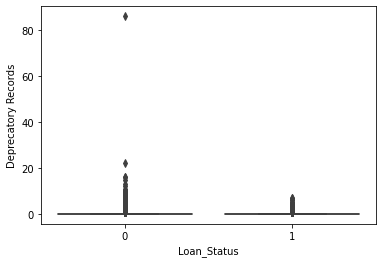

In [19]:
sns.boxplot(x=df['Loan_Status'],y=df['Deprecatory Records'])

In [20]:
pd.options.display.float_format = '{:.2f}'.format

In [21]:
import scipy
from scipy import stats


def trimmed_mean(data):
    num = pd.DataFrame(data.select_dtypes(include = np.number))    
    n,mv, tmv = [],[],[]                                          
    for i in range(num.shape[1]) :                                
        n.append(num.iloc[:,i].name)                                                                           
        mv.append(num.iloc[:,i].mean())                            
        tmv.append(scipy.stats.trim_mean(num.iloc[:,i], proportiontocut = 0.20)) 
   
    df = pd.DataFrame([n,mv,tmv],index=["Variable","Mean","Trimmed Mean"])      
   
    return(df.T) 

In [22]:
trimmed_mean(df)

,Variable,Mean,Trimmed Mean
0,ID,83946.25,83896.38
1,Asst_Reg,3798914.12,3845447.78
2,Yearly Income,133556.06,117618.60
3,Unpaid 2 years,0.33,0.00
4,Already Defaulted,0.01,0.00
5,Debt to Income,30.91,30.34
6,Postal Code,51533.90,51383.10
7,Lend Amount,25920.54,24067.08
8,Deprecatory Records,0.20,0.00
9,Interest Charged,16.52,16.52


##### Interpretation: The trimmed mean for yearly income,Lend Amount, Present Balance,Total Unpaid CL,Unpaid Amount,Inquiries is lower than the mean value. We infer that there are significantly many extreme observations. Similarly, for the Asst_Reg,Debt to Income,Usage Rate,Account Open,Duration there is a slight difference in the means, indicating the presence of outliers.
##### There is no difference in the values for Interest Charged.

##### Interpretation: The above values show the median for all the variables. These values divide the observations into two halves implying that there are exactly 50% of observations above this point and 50% below.
##### For instance, consider the Lend Amount, there are 50% of values with figure less than 23940 and 50% of items with price more than 23940.

In [23]:
df_cat = df.select_dtypes(include=object)

# calculate the mode
df_cat.mode()

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Reason,Claim Type
0,2,>10yrs,Source Verified,Mortgage,School Teacher,whole,California,debt consolidation,I


##### We see that all the variales are unimodal

In [24]:
# get the summary of categorical variables
df_cat.describe()

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Reason,Claim Type
count,87500,87500,87500,87500,87500,87500,87500,87500,87500
unique,7,11,3,5,40354,2,49,13,2
top,2,>10yrs,Source Verified,Mortgage,School Teacher,whole,California,debt consolidation,I
freq,24966,30849,34504,44160,2999,46300,12625,52559,87454


# Univariate Analysis

In [25]:
df['Reason'].value_counts()

debt  consolidation    52559
credit  card           21102
home  improvement       4886
other                   3774
major  purchase         1512
medical                  821
small  business          751
car                      710
moving                   503
vacation                 424
house                    311
wedding                  109
renewable  energy         38
Name: Reason, dtype: int64

#### Debt consolidation is the main reason for applying for the loan

### Lets look at how the data is distributed over its range

In [26]:
df_num=df.select_dtypes(include=np.number)

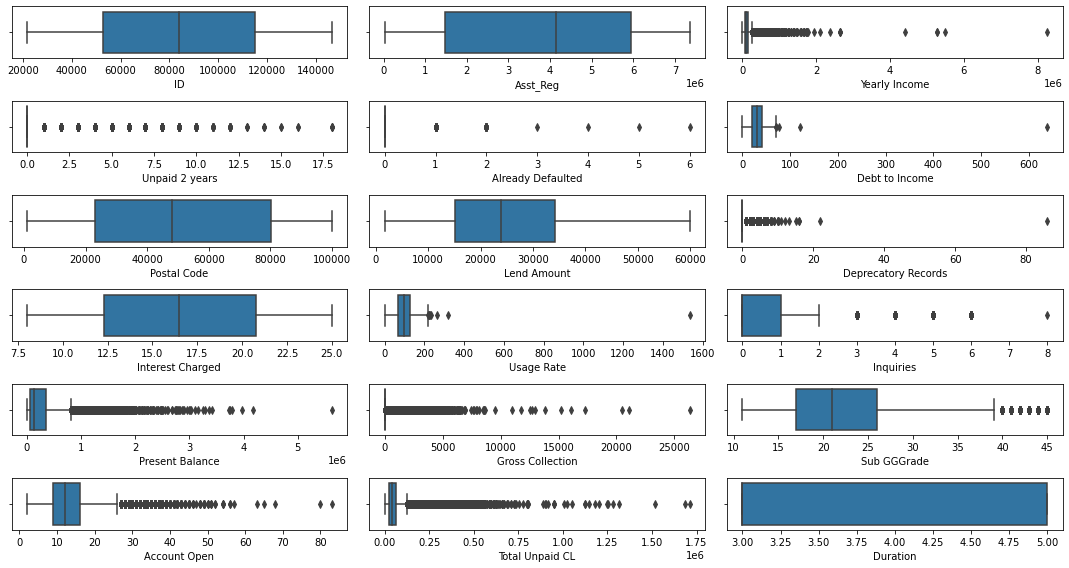

In [27]:
fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(15, 8))

for variable, subplot in zip(df_num.columns, ax.flatten()):   
    sns.boxplot(df_num[variable], ax = subplot)
plt.tight_layout()

plt.show()

###### From the above boxplots, we can infer that except Asst_reg and Durations, all the numerical columns have outliers which we may have to deal later

In [28]:
## Lets see whether the target variable is balanced or not

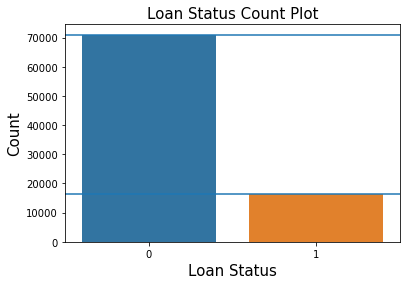

In [29]:
sns.countplot(x = df['Loan_Status'])

plt.title('Loan Status Count Plot', fontsize = 15)
plt.xlabel('Loan Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.axhline(y = 70988)
plt.axhline(y = 16512)
plt.show()
## We have very less proportion of cases in which loan is not given as compared to cases when loan is given

In [30]:
df['Loan_Status'].value_counts()

0    70988
1    16512
Name: Loan_Status, dtype: int64

In [31]:
print(70988/len(df['Loan_Status']))
print('-----------------------------------------------------------')
print(16512/len(df['Loan_Status']))

0.8112914285714286
-----------------------------------------------------------
0.18870857142857142


The ratio of our data set is approximately 81.11:18.89. Hence, we need to balance our data set using SMOTE analysis.

# Bivariate Analysis

# Correlation

In [32]:
corr=df.corr()

<AxesSubplot:>

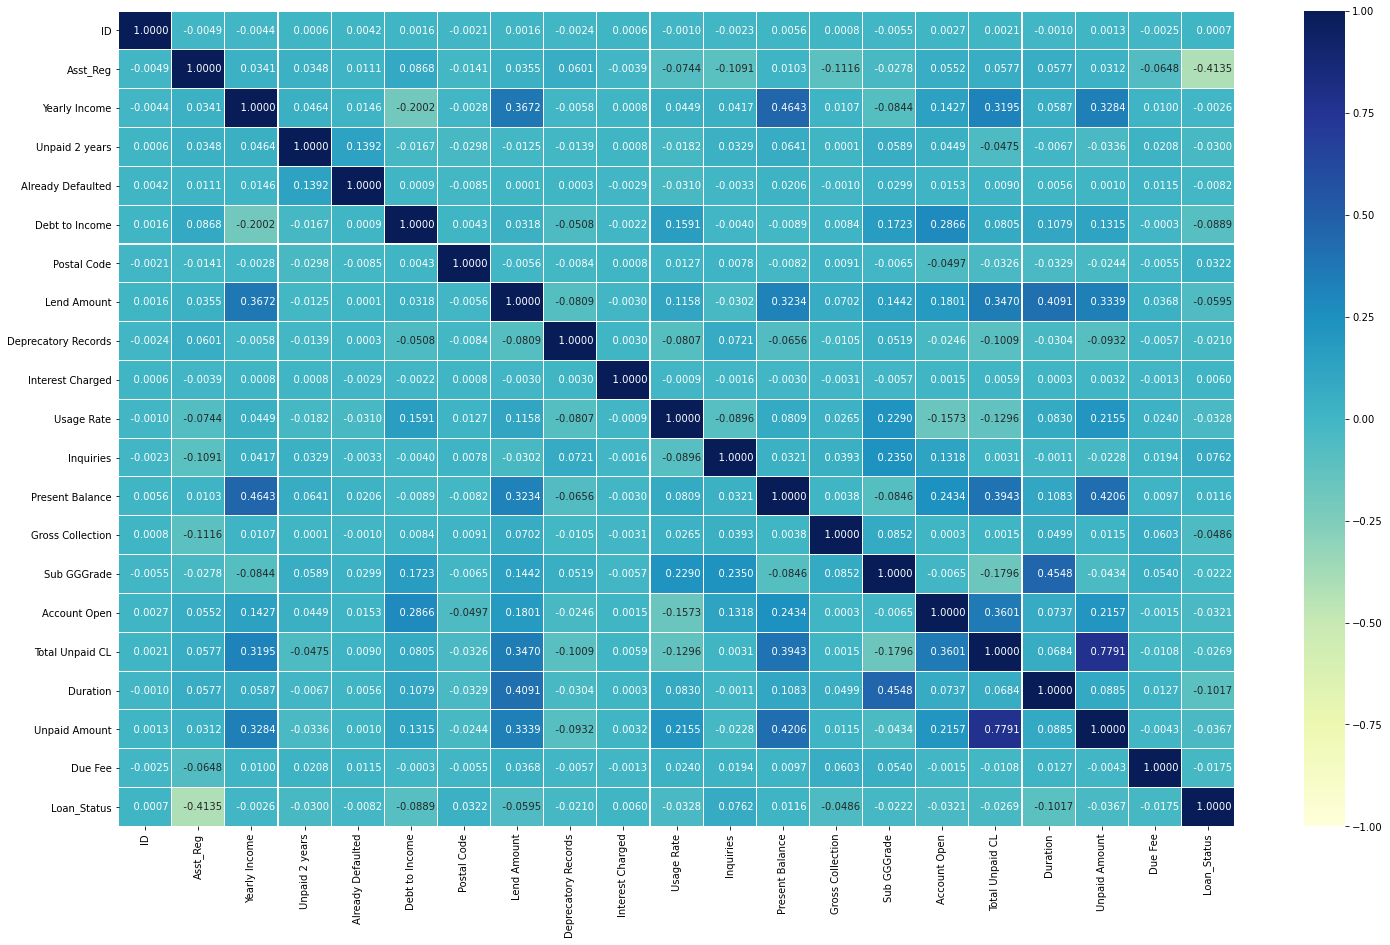

In [33]:
plt.rcParams['figure.figsize']=[25,15]
sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f',)


#### From the above we can say that Unpaid Amount and Total Unpaid CL are highly correlated,Asst_reg and Loan/No Loan are correlated,Present balance and Yearly Income are correlated as obvious. Also we can say that Lend Amount and Yearly Income have some correlation between them. Total Unpaid CL and Present Balance have correlation between them. lend Amount and Duration are correlated as well

<Figure size 1080x576 with 0 Axes>

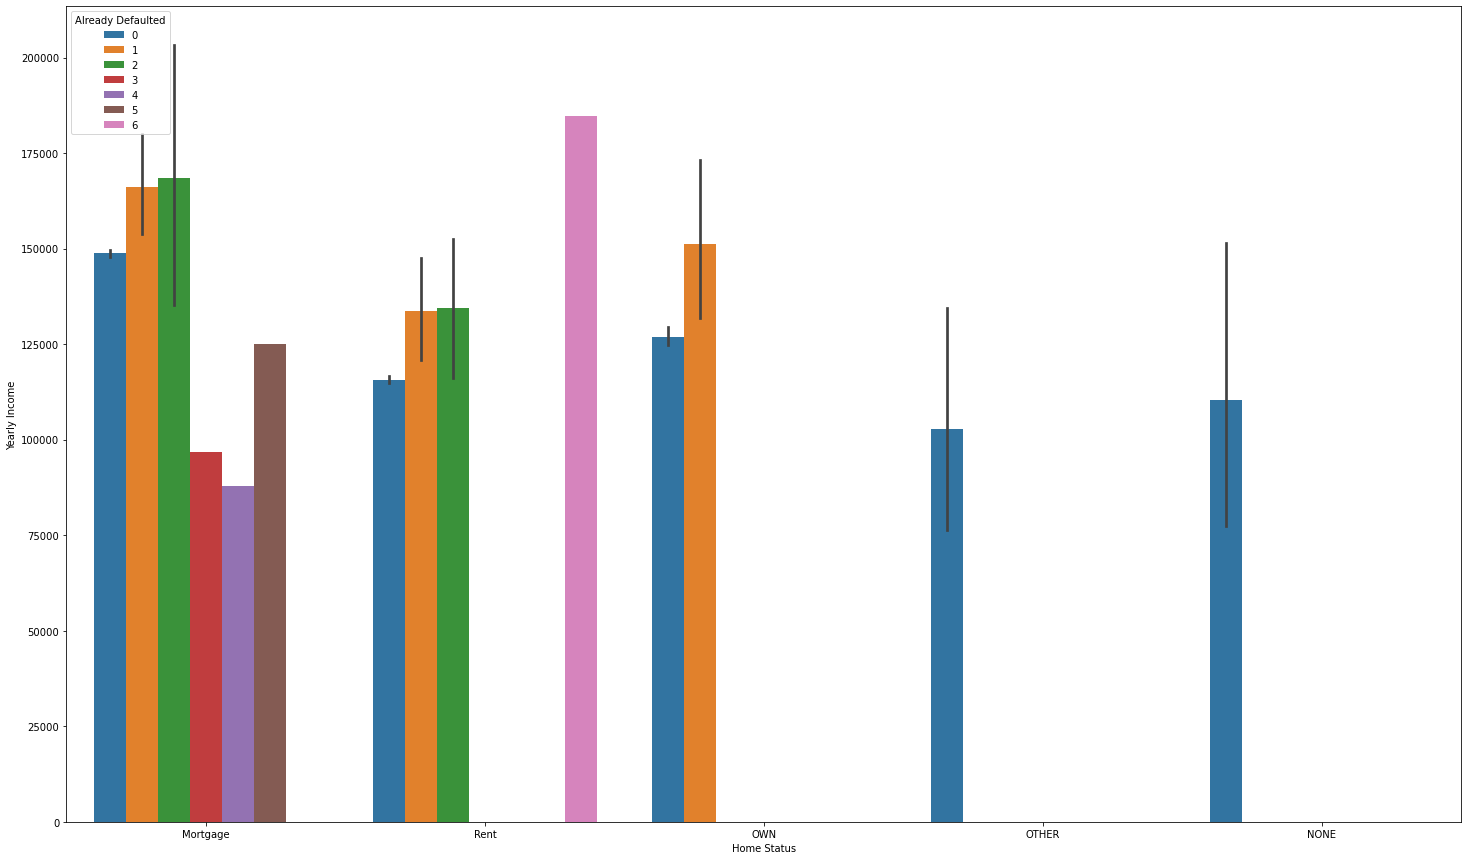

<Figure size 1080x576 with 0 Axes>

In [34]:
sns.barplot(x = df['Home Status'], y = df['Yearly Income'], hue = df['Already Defaulted'])
plt.figure(figsize=(15,8))

From the above , we can see that people who have Home Status as mortgage have defaulted most, and most of them have defaulted on 2 loans.

In [35]:
## Visualization using scatter plot to analyse the Numerical variables

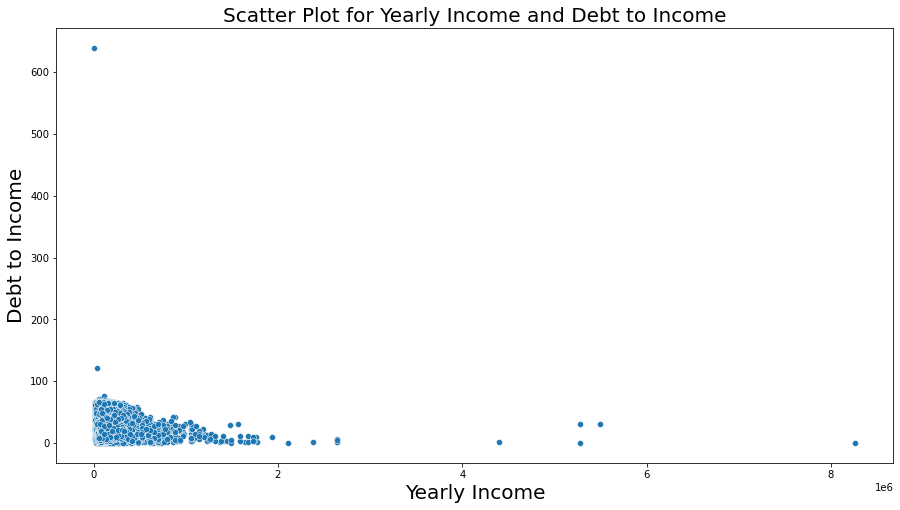

In [36]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('Yearly Income', 'Debt to Income', data = df)
ax.set_ylabel('Debt to Income', fontsize=20)
ax.set_xlabel('Yearly Income', fontsize=20)
plt.title("Scatter Plot for Yearly Income and Debt to Income", fontsize=20)
plt.show()

### As the yearly income of an individual increases , the debt to income ratio decreases.

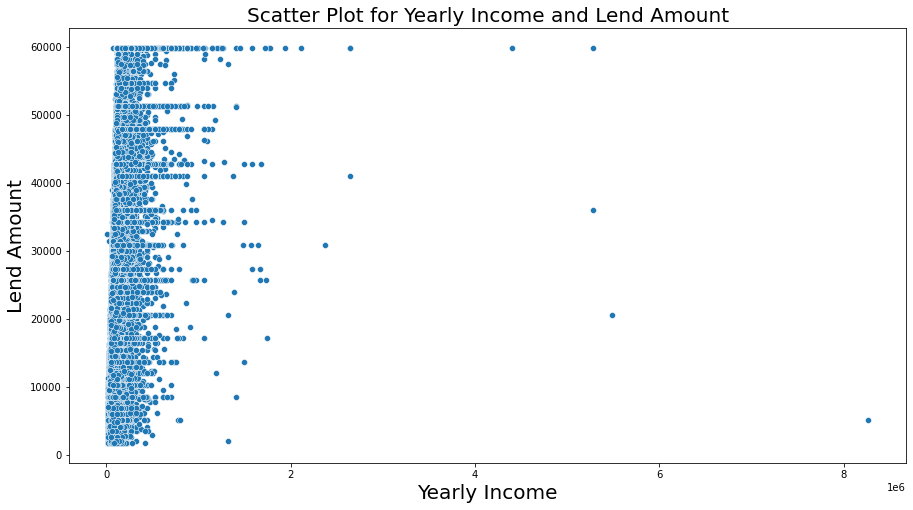

In [37]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('Yearly Income', 'Lend Amount', data = df)
ax.set_ylabel('Lend Amount', fontsize=20)
ax.set_xlabel('Yearly Income', fontsize=20)
plt.title("Scatter Plot for Yearly Income and Lend Amount", fontsize=20)
plt.show()

In [38]:
### Yearly income of an individual does not have any effect on the amount that is lent to him

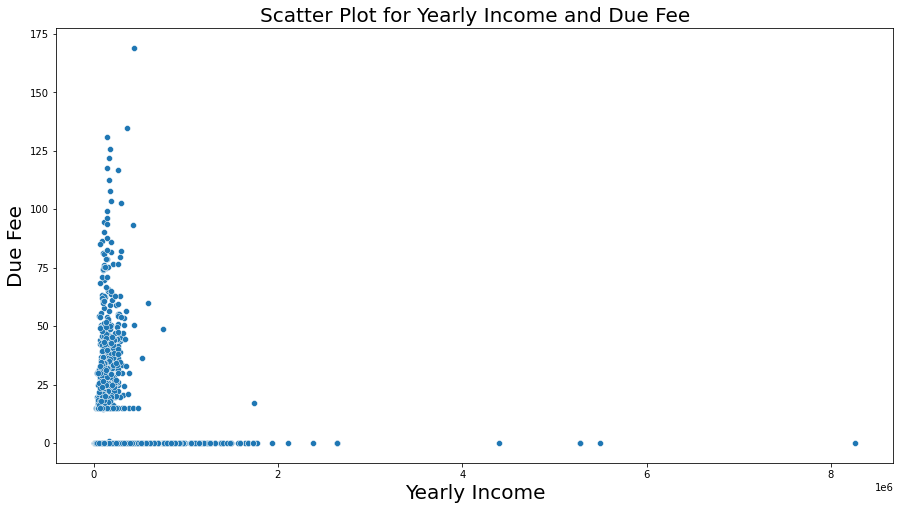

In [39]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('Yearly Income', 'Due Fee', data =df)
ax.set_ylabel('Due Fee', fontsize=20)
ax.set_xlabel('Yearly Income', fontsize=20)
plt.title("Scatter Plot for Yearly Income and Due Fee", fontsize=20)
plt.show()

#####   People with higher income have quite less fee due to be paid, meaning that people with higher income   dont delay in payment of loan

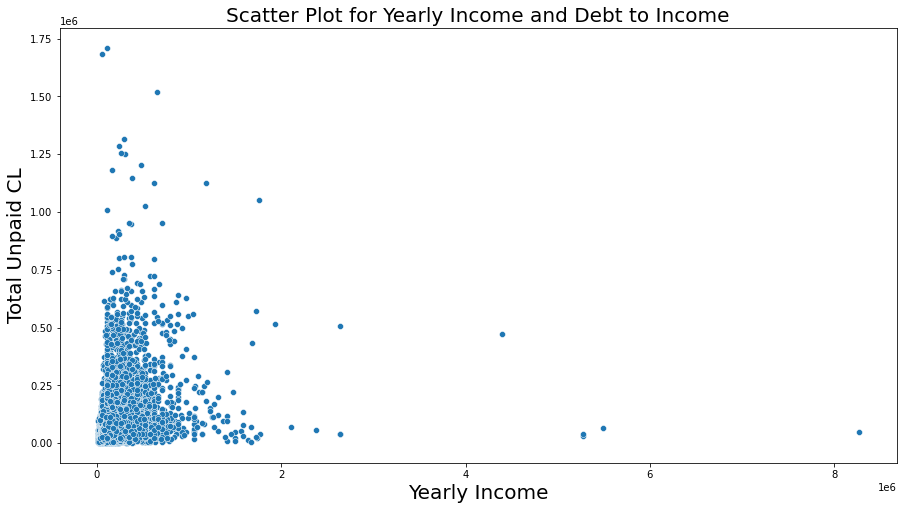

In [40]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('Yearly Income', 'Total Unpaid CL', data = df)
ax.set_ylabel('Total Unpaid CL', fontsize=20)
ax.set_xlabel('Yearly Income', fontsize=20)
plt.title("Scatter Plot for Yearly Income and Debt to Income", fontsize=20)
plt.show()

In [41]:
##### People with lesser yearly income have 

#####  People with lesser income have high value of unpaid claims. 

In [42]:
### Categorical and Numerical Variables Visualization

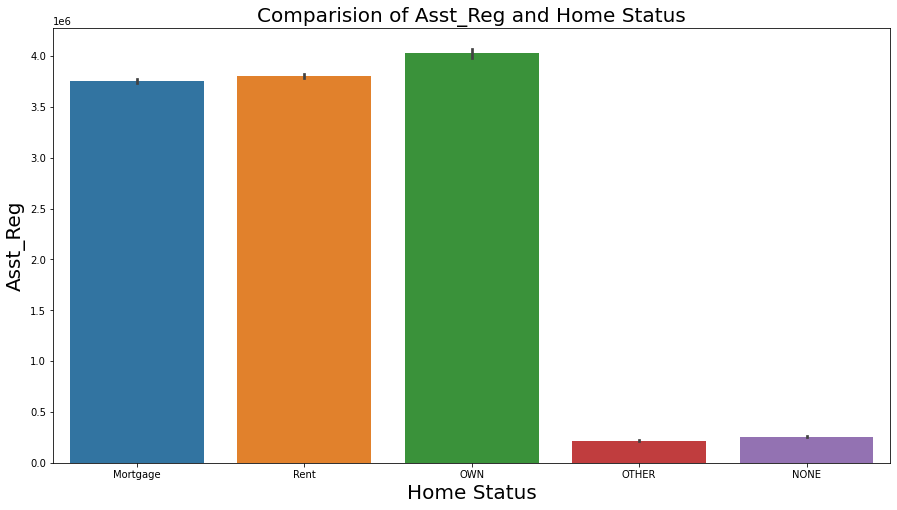

In [43]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.barplot(x='Home Status',y='Asst_Reg', data=df)
ax.set_ylabel('Asst_Reg', fontsize=20)
ax.set_xlabel('Home Status', fontsize=20)
plt.title("Comparision of Asst_Reg and Home Status", fontsize=20)
plt.show()

In [44]:
####  People with high value of asset have own home

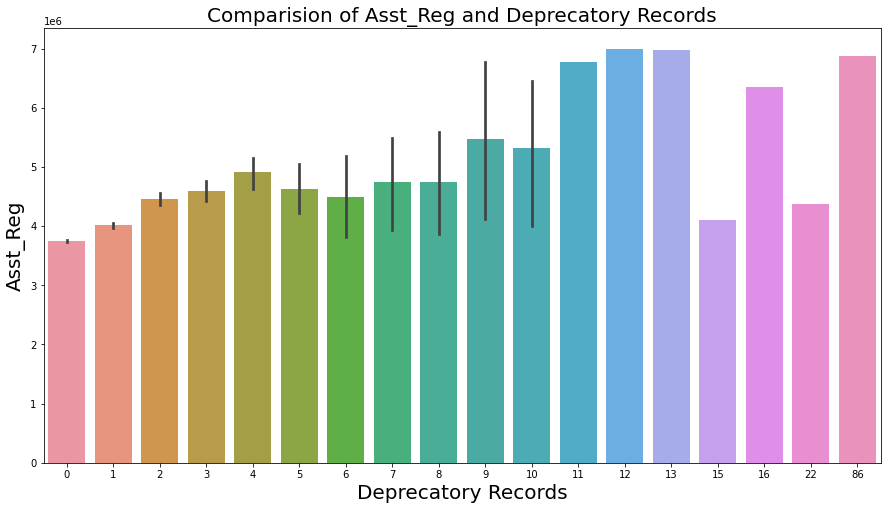

In [45]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.barplot(x='Deprecatory Records',y='Asst_Reg', data=df)
ax.set_ylabel('Asst_Reg', fontsize=20)
ax.set_xlabel('Deprecatory Records', fontsize=20)
plt.title("Comparision of Asst_Reg and Deprecatory Records", fontsize=20)
plt.show()

##### An interesting insight which we can gather with this data is that people with higher value of assets have highest deprecatory records representing risk

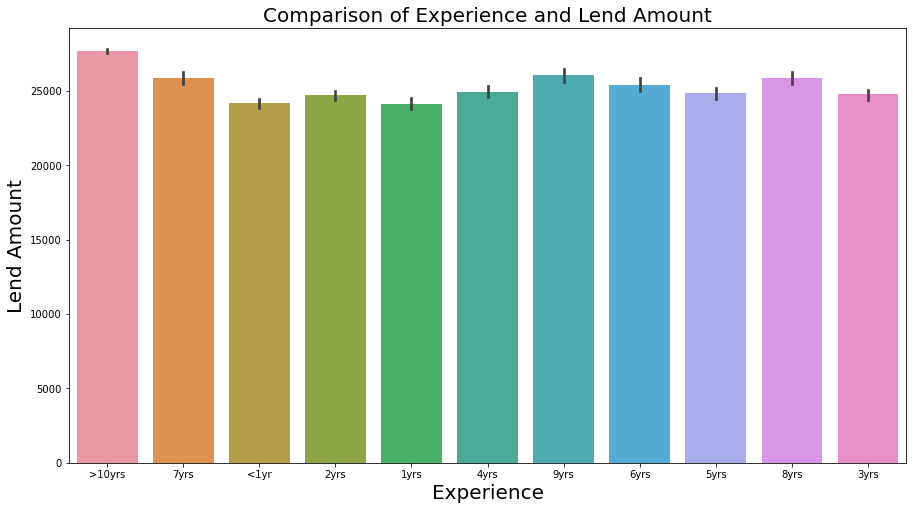

In [46]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.barplot(x='Experience',y='Lend Amount', data=df)
ax.set_ylabel('Lend Amount', fontsize=20)
ax.set_xlabel('Experience', fontsize=20)
plt.title("Comparison of Experience and Lend Amount", fontsize=20)
plt.show()

######  People with more than 10 years of experience have more amount lent to him

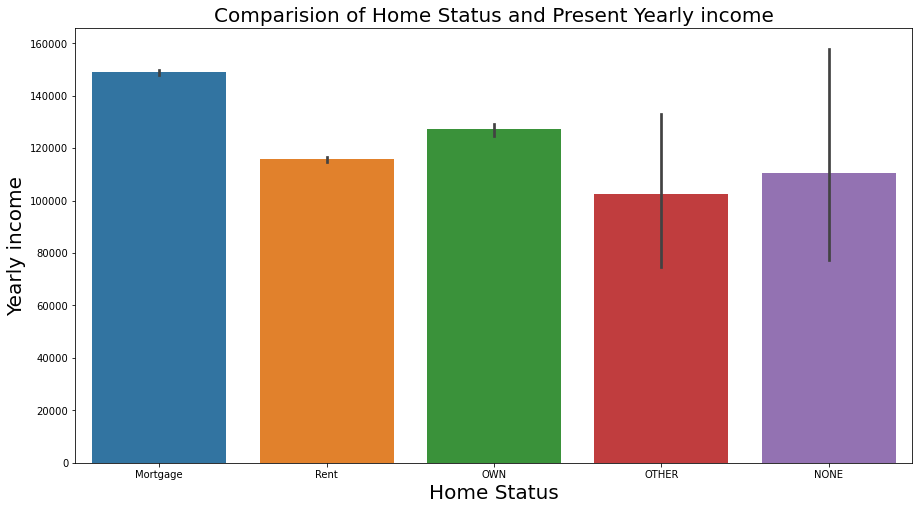

In [47]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.barplot(x='Home Status',y='Yearly Income',data=df)
ax.set_ylabel('Yearly income', fontsize=20)
ax.set_xlabel('Home Status', fontsize=20)
plt.title("Comparision of Home Status and Present Yearly income", fontsize=20)
plt.show()

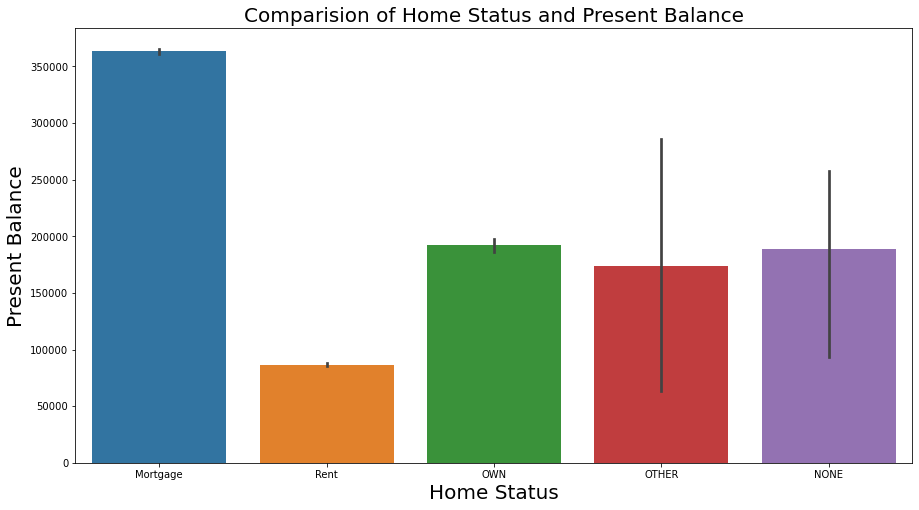

In [48]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.barplot(x='Home Status',y='Present Balance', data=df)
ax.set_ylabel('Present Balance', fontsize=20)
ax.set_xlabel('Home Status', fontsize=20)
plt.title("Comparision of Home Status and Present Balance", fontsize=20)
plt.show()

##### People with highest amount of present balance have their homes mortgaged

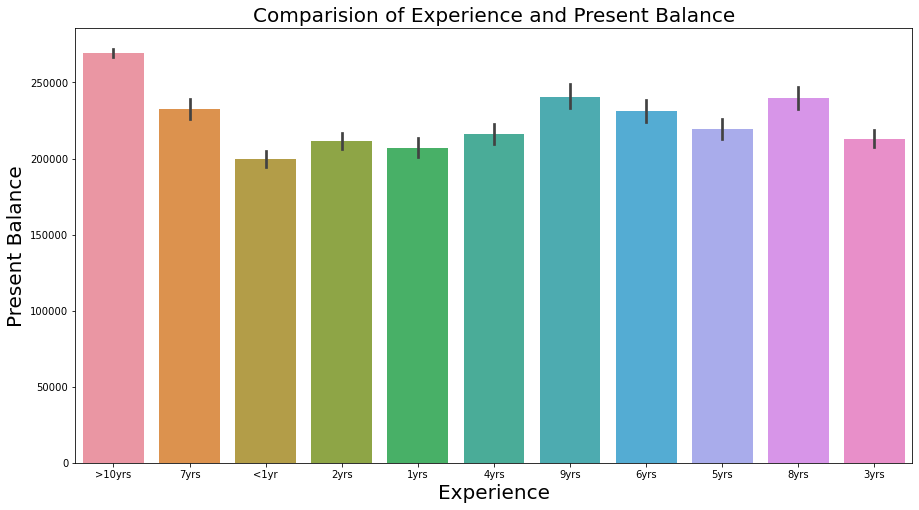

In [49]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.barplot(x='Experience',y='Present Balance', data=df)
ax.set_ylabel('Present Balance', fontsize=20)
ax.set_xlabel('Experience', fontsize=20)
plt.title("Comparision of Experience and Present Balance", fontsize=20)
plt.show()

######  People with more than 10 years of experience have the highest amount of Present balance

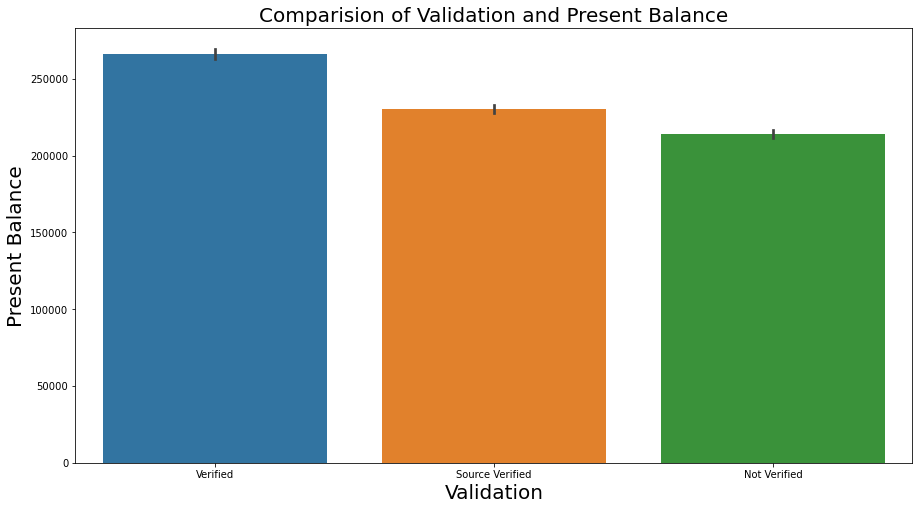

In [50]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.barplot(x='Validation',y='Present Balance', data=df)
ax.set_ylabel('Present Balance', fontsize=20)
ax.set_xlabel('Validation', fontsize=20)
plt.title("Comparision of Validation and Present Balance", fontsize=20)
plt.show()

In [51]:
#### The people who have lesser present balance have not been verified

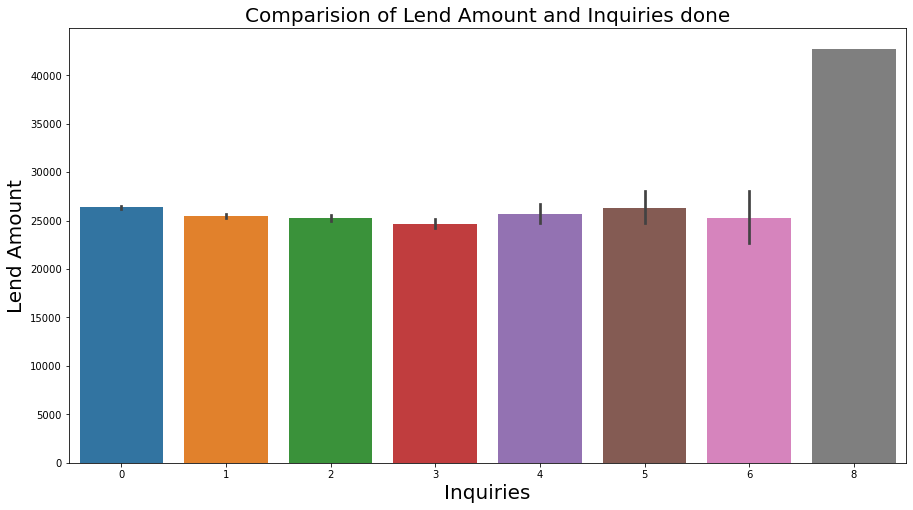

In [52]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.barplot(x='Inquiries',y='Lend Amount', data=df)
ax.set_ylabel('Lend Amount', fontsize=20)
ax.set_xlabel('Inquiries', fontsize=20)
plt.title("Comparision of Lend Amount and Inquiries done", fontsize=20)
plt.show()

###### People with higher amount lent have made the most inquiries in last 6 months

In [53]:
##### Analysis of Categorical vs Numerical

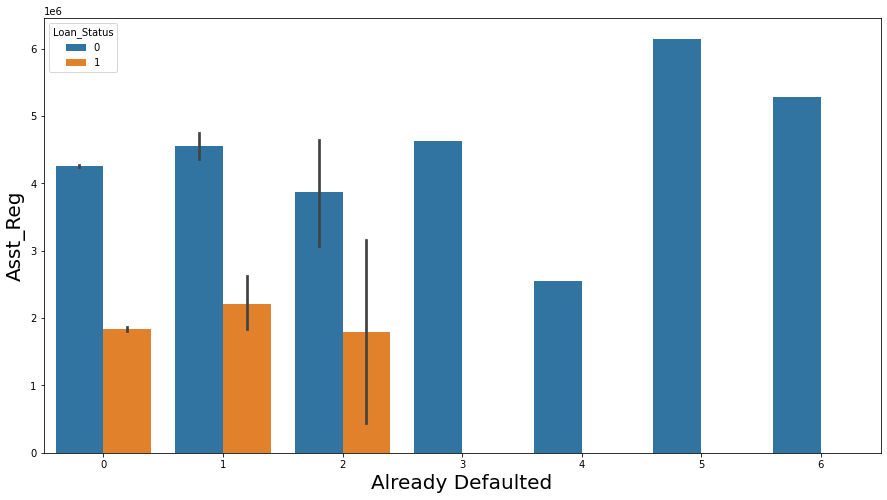

In [54]:
plt.rcParams["figure.figsize"] = [15,8] 
ax = sns.barplot(data=df, x='Already Defaulted', y='Asst_Reg', hue='Loan_Status')
ax.set_ylabel('Asst_Reg', fontsize=20)
ax.set_xlabel('Already Defaulted', fontsize=20)
plt.show()

#### Interesting to say , that even if the number of other loans the borrower has defaulted on is large,he can be given loan if he has assets registered under his/her name

In [55]:
df.groupby([df.GGGrade,df["Loan_Status"]])["Yearly Income"].mean()

GGGrade  Loan_Status
1        0             155587.55
         1             152204.21
2        0             136810.20
         1             129338.22
3        0             126638.08
         1             128768.17
4        0             123400.36
         1             126829.71
5        0             125902.43
         1             134911.26
6        0             127328.29
         1             134388.37
7        0             139655.18
         1             138963.67
Name: Yearly Income, dtype: float64

In [56]:
### We can see that GGGrade is not affecting the Yearly income at all, and none of them are playing any 

<AxesSubplot:xlabel='Loan_Status', ylabel='Deprecatory Records'>

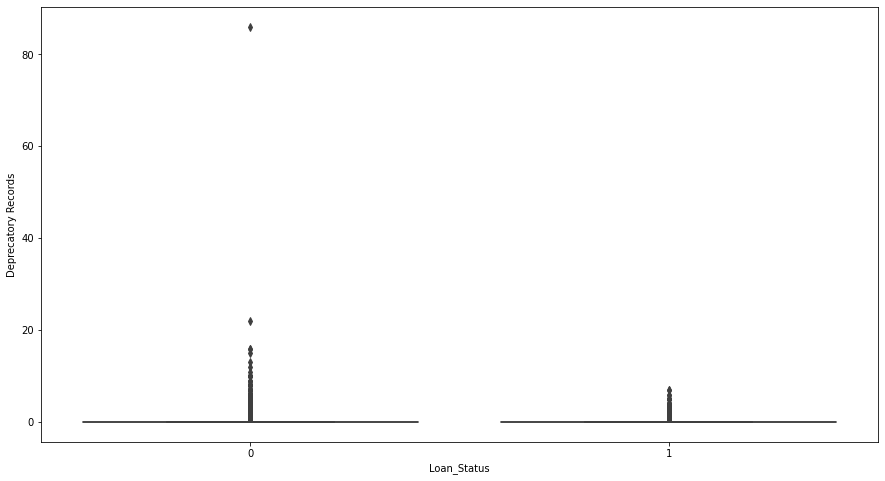

In [57]:
sns.boxplot(df['Loan_Status'],df['Deprecatory Records'])
## People with higher deprecatory records are still granted the loan, which is absurd. We might consider dropping this column

<AxesSubplot:xlabel='Loan_Status', ylabel='Yearly Income'>

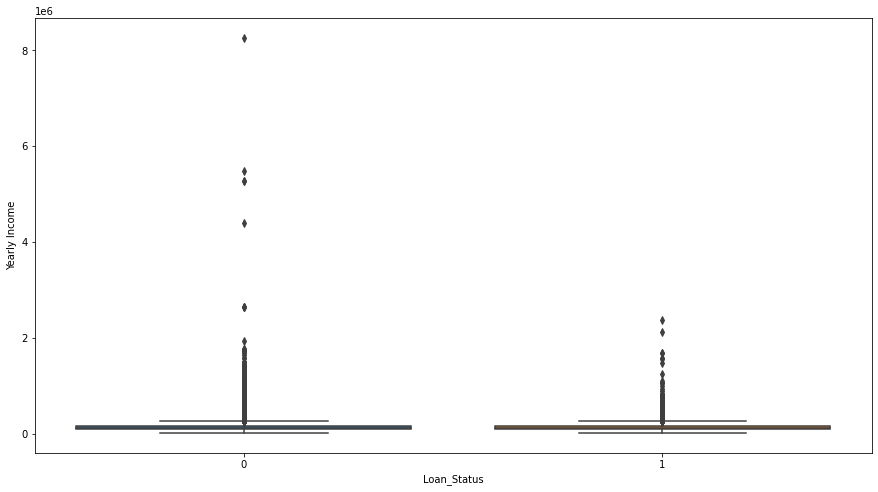

In [58]:
sns.boxplot(x=df['Loan_Status'],y=df['Yearly Income'])

<AxesSubplot:xlabel='Experience', ylabel='Yearly Income'>

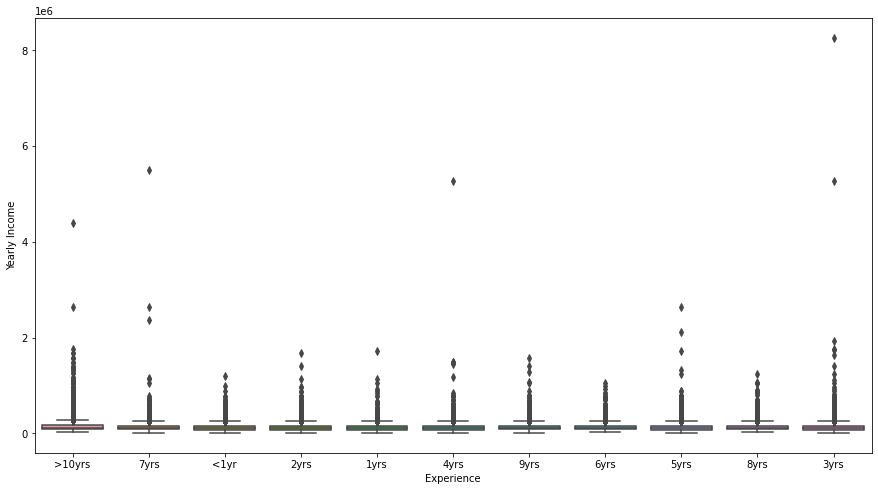

In [59]:
sns.boxplot(x=df['Experience'],y=df['Yearly Income'])

In [60]:
df.groupby(df["Loan_Status"])["Yearly Income"].mean()

Loan_Status
0   133677.39
1   133034.45
Name: Yearly Income, dtype: float64

In [61]:
df1=pd.crosstab(df["Experience"],df["Loan_Status"],margins=True)

In [62]:
df1["0%"]=df1[0]/df1["All"]

In [63]:
df1["1%"]=df1[1]/df1["All"]

In [64]:
df1

Loan_Status,0,1,All,0%,1%
Experience,,,,,
1yrs,4803,1050,5853,0.82,0.18
2yrs,6509,1555,8064,0.81,0.19
3yrs,6009,1341,7350,0.82,0.18
4yrs,4344,980,5324,0.82,0.18
5yrs,4524,1099,5623,0.80,0.20
6yrs,3286,969,4255,0.77,0.23
7yrs,3708,1054,4762,0.78,0.22
8yrs,3748,856,4604,0.81,0.19
9yrs,2885,722,3607,0.80,0.20


In [65]:
## Acceptance and rejection are not dependent on experience
### people with more thn 10 years are applying for overall 35% of loans ie 30849/87500

In [66]:
df.Experience.value_counts()

>10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: Experience, dtype: int64

In [67]:
df.Validation.value_counts()

## source verified loans are heighest

Source Verified    34504
Verified           26642
Not Verified       26354
Name: Validation, dtype: int64

In [68]:
df2=pd.crosstab(df["Validation"],df["Loan_Status"],margins=True)#,normalize=True,aggfunc=)

In [69]:
df2["0%"]=df2[0]/df2["All"]
df2["1%"]=df2[1]/df2["All"]

In [70]:
df2.head()
## heighest rate of loan acceptance is in Source verified


Loan_Status,0,1,All,0%,1%
Validation,,,,,
Not Verified,20644,5710,26354,0.78,0.22
Source Verified,29470,5034,34504,0.85,0.15
Verified,20874,5768,26642,0.78,0.22
All,70988,16512,87500,0.81,0.19


In [71]:
# Yearly income
df.groupby(["Loan_Status"])["Yearly Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
0,70988.00,133677.39,98608.68,8800.00,85004.81,114400.00,158400.00,8264030.72
1,16512.00,133034.45,82369.08,13128.97,88000.00,114400.00,158400.00,2376000.00


<AxesSubplot:xlabel='Loan_Status', ylabel='Yearly Income'>

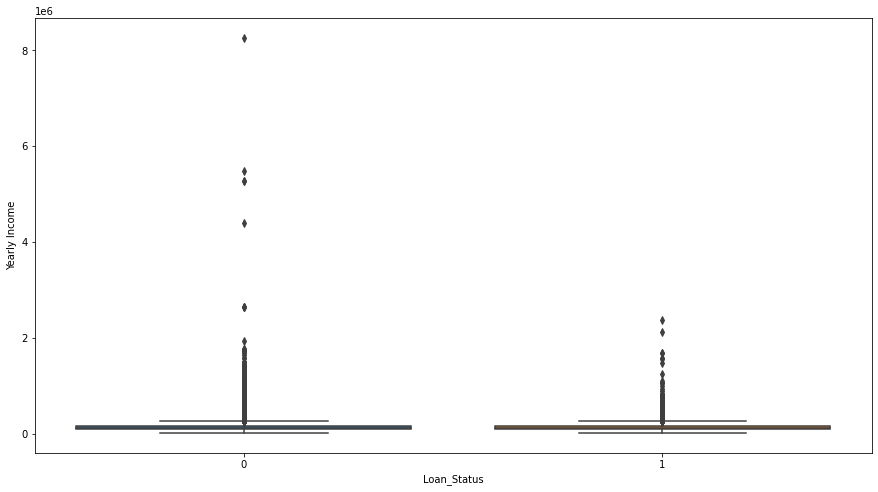

In [72]:
sns.boxplot(x=df["Loan_Status"],y=df["Yearly Income"])

In [73]:
## In loan acceptance category,there are multiple outliers present which inform us that if one has exceptionally high salary,
## their loan would be accepted but mean for both loan and no loan is same

In [74]:
df["Home Status"].value_counts()/87500

Mortgage   0.50
Rent       0.40
OWN        0.10
OTHER      0.00
NONE       0.00
Name: Home Status, dtype: float64

In [75]:
df.groupby(["Home Status","Loan_Status"]).size()

Home Status  Loan_Status
Mortgage     0              35472
             1               8688
NONE         1                  4
OTHER        0                  2
             1                  4
OWN          0               6993
             1               1423
Rent         0              28521
             1               6393
dtype: int64

In [76]:
### People who have home status as Mortgage are applying more for loans

In [77]:
df3=pd.crosstab(df["Home Status"],df["Loan_Status"],margins=True)#,normalize=True,aggfunc=)
df3["0%"]=df3[0]/df3["All"]
df3["1%"]=df3[1]/df3["All"]
df3["Overall"]=df3["All"]/87500

In [78]:
### People who have home status as Mortgage are applying for 50% of loans  
## People having other as home status have least chance(1/3rd) of loan acceptance
## People having home status as None are not given any loans
df3

Loan_Status,0,1,All,0%,1%,Overall
Home Status,,,,,,
Mortgage,35472,8688,44160,0.80,0.20,0.50
NONE,0,4,4,0.00,1.00,0.00
OTHER,2,4,6,0.33,0.67,0.00
OWN,6993,1423,8416,0.83,0.17,0.10
Rent,28521,6393,34914,0.82,0.18,0.40
All,70988,16512,87500,0.81,0.19,1.00


In [79]:
df["Unpaid 2 years"].value_counts()
### most number of have 0 unpaid emi in 2 years
## we can bin it in 3 categroies 0,1-2,>2

0     69767
1     11604
2      3658
3      1274
4       565
5       275
6       156
7        67
8        43
9        26
10       22
12       15
11       13
14        4
18        4
13        3
15        2
16        2
Name: Unpaid 2 years, dtype: int64

In [80]:
df.groupby(["Already Defaulted","Loan_Status"])["Loan_Status"].size()

## Most of the applicants have not defaulted in any other previous loans but whether a person will be given loan or not 
##is not at all dependent on Previous defaults on loans.

Already Defaulted  Loan_Status
0                  0              70592
                   1              16443
1                  0                372
                   1                 67
2                  0                 20
                   1                  2
3                  0                  1
4                  0                  1
5                  0                  1
6                  0                  1
Name: Loan_Status, dtype: int64

In [81]:
(70592+16443)/87055
## Almost 100 % havent defaulted in the past if we round off the value

0.9997702601803458

In [82]:
df.groupby('Loan_Status')['Lend Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
0,70988.00,26334.63,14535.62,1710.00,15390.00,24282.00,34200.00,59850.00
1,16512.00,24140.27,13847.88,1710.00,13680.00,20520.00,33174.00,59850.00


In [83]:
## We can see that lend amount is not very significant feature.

In [84]:
df3=pd.crosstab(df["Inquiries"],df["Loan_Status"],margins=True)#,normalize=True,aggfunc=)
df3["0%"]=df3[0]/df3["All"]
df3["1%"]=df3[1]/df3["All"]
df3["Overall"]=df3["All"]/87500

In [85]:
df3

#### There is not very much diffrence in betwwen whether a person will get the loan or not in case 
##he has done the more inquiries  but still we can clearly see most of people (57%) have not called for 
# any inquiry so we can look forward to divide it in two cat only

Loan_Status,0,1,All,0%,1%,Overall
Inquiries,,,,,,
0,41577,8276,49853,0.83,0.17,0.57
1,18858,4743,23601,0.80,0.20,0.27
2,6862,2178,9040,0.76,0.24,0.10
3,2600,937,3537,0.74,0.26,0.04
4,802,254,1056,0.76,0.24,0.01
5,221,94,315,0.70,0.30,0.00
6,67,30,97,0.69,0.31,0.00
8,1,0,1,1.00,0.00,0.00
All,70988,16512,87500,0.81,0.19,1.00


<AxesSubplot:xlabel='Present Balance', ylabel='Deprecatory Records'>

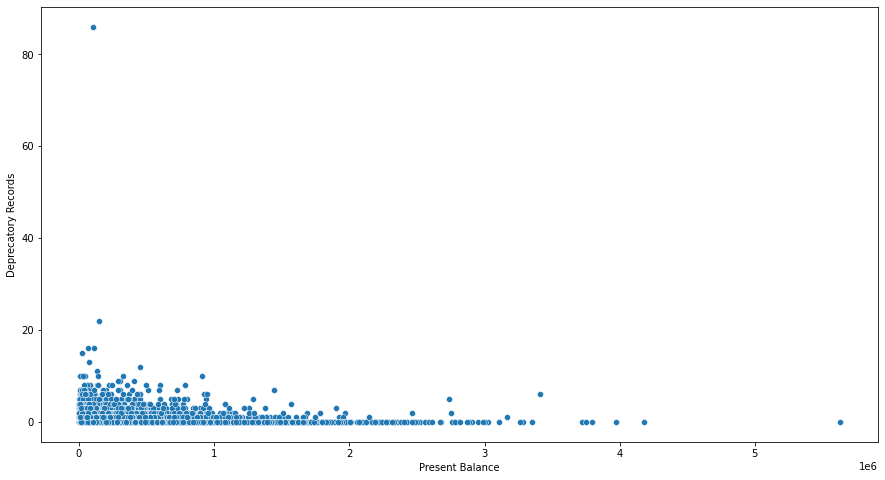

In [86]:
sns.scatterplot(x=df["Present Balance"],y=df["Deprecatory Records"])
## People with high present balance have less number of deprecatory records

**Key takeaways**

1. There 7 categories in the GG Grade variable. Most of them belong to II and III.**
2. Most of the customers are in the more than 10 years experience range.
3. There are 3 categories in the column Validation, we can see that most loans are Source Verified and chances for getting a loan are 7% higher if it belongs to source verified.
4. The median  lend amount is 23940 
5. There are too many of Postal codes and Designations available in data which are not giving any relevant information because of negligible cluster size.
6. If asset registered under the name of applicant have more value the chance of getting loans are very high.
7. Experience has 11 categories which do not particularly show any pattern with income. 35% people account for more than 10 years of experience and other categories have almost equal distribution of applicants accordingly we can use it to develop a pitching strategy.

8. Whether the loan will be granted or not is very less dependent on yearly income Both for Loan and No loan the median income is 114400.
9. Max number of applicants  have their home status as Mortgaged(50%) followed by Rent(40%)
10. Most of the applicants have not done any Inquiries.
11. Loan/ No Loan are also not dependent on GG Grade of loan and  45% people are from II and III Grade.
12. Even if an applicant has defaulted on EMI many times in past two years on other loans, bank is still granting the loan because of higher Assets Registered.
13. Most of the applicants(99.9%) have not defaulted in any other loans.(Shows redundancy)
14. loans having loan duration have higher lend amount
15. bank is only providong loans for 5 and 3 years 68% loans are of short duration


## Statistical Tests

### Chi square test (For categorical Features)

- Ho: There is no relationship between two categorical columns
- Ha: There is relationship between categorical columns


**Question**- Is there any relationship between categorical columns and people who were given a loan?

In [10]:
from statsmodels.stats import weightstats as stest
from scipy import stats
import statsmodels
import statsmodels.api as sm

In [13]:
col=['GGGrade','Validation','Home Status','File Status','Duration','Reason','Experience','Claim Type','Sub GGGrade']

In [14]:
for i in col:
    response=pd.crosstab(index=train[i], columns=train.Loan_Status)
    (chi2,p, dof,_) = stats.chi2_contingency([response.iloc[0].values,response.iloc[1].values])
    print(i)
    print('Chi2',chi2)
    print('PValue',p)
    print('DOF',dof)
    print('\n')

GGGrade
Chi2 23.67323907552784
PValue 1.1415898237572043e-06
DOF 1


Validation
Chi2 514.2653462043135
PValue 7.485226691582966e-114
DOF 1


Home Status
Chi2 11.639413274002754
PValue 0.0006456896593394083
DOF 1


File Status
Chi2 1792.1325746621703
PValue 0.0
DOF 1


Duration
Chi2 905.0632060076637
PValue 7.782945756987817e-199
DOF 1


Reason
Chi2 13.37229570618434
PValue 0.00025536857819185834
DOF 1


Experience
Chi2 3.9369491077953573
PValue 0.047236371647075795
DOF 1


Claim Type
Chi2 9.507618293528523
PValue 0.002046205766921692
DOF 1


Sub GGGrade
Chi2 1.7154847747021256
PValue 0.19027529261636927
DOF 1




## Statistical Testing for numerical features

In [18]:
num=['Asst_Reg','Yearly Income','Unpaid 2 years','Already Defaulted','Debt to Income','Lend Amount','Deprecatory Records',
    'Interest Charged','Usage Rate','Inquiries','Present Balance','Gross Collection','Account Open','Total Unpaid CL','Unpaid Amount','Due Fee']

In [16]:
pd.options.display.max_columns=None

In [20]:
for i in num:
    x=train[train['Loan_Status']==0][i]
    z=train[train['Loan_Status']==1][i]
    Stats, p_val=stest.ztest(x1=x,x2=z,value = 0, alternative = 'two-sided')
    if p_val > 0.05:
        print('For feature: {}, P_value is {} it is not significant'.format(i,p_val))
    
    else:
        print('For feature: {}, P_value is {} it is significant'.format(i,p_val))
    print('\n') 

For feature: Asst_Reg, P_value is 0.0 it is significant


For feature: Yearly Income, P_value is 0.43708607782468045 it is not significant


For feature: Unpaid 2 years, P_value is 6.430516473520699e-19 it is significant


For feature: Already Defaulted, P_value is 0.01485109337419599 it is significant


For feature: Debt to Income, P_value is 1.0085832007549124e-153 it is significant


For feature: Lend Amount, P_value is 1.5247846042637323e-69 it is significant


For feature: Deprecatory Records, P_value is 5.070418413788257e-10 it is significant


For feature: Interest Charged, P_value is 0.07649769989818583 it is not significant


For feature: Usage Rate, P_value is 2.5844893156591476e-22 it is significant


For feature: Inquiries, P_value is 4.638986380861217e-113 it is significant


For feature: Present Balance, P_value is 0.0005927236178083559 it is significant


For feature: Gross Collection, P_value is 6.773598117081615e-47 it is significant


For feature: Account Open, P_valu

#### Feature Engineering 

In [22]:
df=train.copy()

In [21]:
#### Unpaid 2 years
zero=[0]
one=[1]
morethan_one=[4,2,3,11,5,6,7,9,12,8,10,18,16,15,13,14]
def emi_def(x):
    if x in zero:
        return "zero_time_def"
    if x in one:
        return "one_time_def"
    if x in morethan_one:
        return 'def_morethan2times'

In [23]:
df['Unpaid 2 years'].unique()


array([ 0,  4,  2,  1,  3, 11,  5,  6,  7,  9, 12,  8, 10, 18, 16, 15, 13,
       14], dtype=int64)

In [24]:
df["Emi_default"]=df['Unpaid 2 years'].apply(emi_def)
df.drop("Unpaid 2 years",axis=1,inplace=True)

In [26]:
df.dtypes

ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Already Defaulted        int64
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records      int64
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
Loan_Status              int64
Emi_default             object
dtype: object

In [91]:
df.Emi_default.value_counts()

zero_time_def         69767
one_time_def          11604
def_morethan2times     6129
Name: Emi_default, dtype: int64

In [92]:
df.State.unique()

array(['California', 'NC', 'Florida', 'NewJersey', 'LA', 'TX', 'CT', 'MI',
       'OR', 'AR', 'Newyork', 'MT', 'CO', 'Ohio', 'NM', 'MN', 'GA', 'WA',
       'Maryland', 'AL', 'SC', 'PA', 'AZ', 'UT', 'MA', 'VA', 'IL', 'WI',
       'NV', 'HI', 'RI', 'TN', 'OK', 'VT', 'IN', 'AK', 'MO', 'NE', 'NH',
       'DC', 'WV', 'MS', 'KY', 'KS', 'DE', 'ND', 'SD', 'WY', 'ME'],
      dtype=object)

In [27]:
west="WA,OR,ID,MT,WY,CO,UT,AZ,NM,California,NV".split(",")

south="OK,TX,LA,AR,Maryland,MS,AL,TN,KY,WV,GA,Florida,SC,NC,VA,DC,MD,DE,DC,MD".split(",")

North_east='NY,PA,NewJersey,CT,RI,MA,VT,NH,ME,Newyork'.split(",")

Mid_west='ND,SD,Ohio,NE,KS,MO,IA,MN,WI,IL,IN,OH,MI'.split(",")

pacific="HI,AK".split(",")

def state(x):
    if x in west:
        return"west"
    if x in south:
        return "south"
    if x in North_east:
        return"north_east"
    if x in Mid_west:
        return"mid_west"
    if x in pacific:
        return "pacific"

In [28]:
df["zone"]=df.State.apply(state)

df.zone.unique()

array(['west', 'south', 'north_east', 'mid_west', 'pacific'], dtype=object)

In [29]:
df.drop("State",axis=1,inplace=True)
# Dropping State as we have made a new column zone out of it

In [96]:
#df.drop(["Deprecatory Records"],axis=1,inplace=True)
## Dropping deprecatory records as we found loan approval is not at all dependent on this

In [97]:
df.groupby("Reason")["Lend Amount"].median()

Reason
car                   13680.00
credit  card          24795.00
debt  consolidation   25650.00
home  improvement     20520.00
house                 21075.75
major  purchase       17100.00
medical               11970.00
moving                10302.75
other                 13680.00
renewable  energy     17100.00
small  business       23512.50
vacation               8550.00
wedding               13680.00
Name: Lend Amount, dtype: float64

In [98]:
### dividing reason into two 
low=["car","major  purchase","medical","moving","other","renewable  energy","vacation","wedding"]

def reason_amount(x):
    if x in low:
        return "low"
    else:
        return "high"

In [99]:
df["reason_amount"]=df.Reason.apply(reason_amount)
df.drop("Reason",axis=1,inplace=True)

In [34]:
df.drop(['Yearly Income','Interest Charged'],axis=1,inplace=True)

In [30]:
# Feature engineering the experience column.

more_than_10=[">10yrs"]
between5_to_10=['9yrs', '6yrs',
       '5yrs', '8yrs','7yrs']
between0_to_4=['2yrs','3yrs','<1yrs','4yrs']
def expe(x):
    if x in more_than_10:
        return "more_thn_10"
    if x in between5_to_10:
        return "btwn5_to_10"
    if x in between0_to_4:
        return 'btwn0_to_4'

In [31]:
df["Experience_c"]=df.Experience.apply(expe)
df.drop("Experience",axis=1,inplace=True)

In [32]:
## Dropping claim type as no significant information is there from this variable.
## Dropping GGGrade and Sub GGGrade as they are in no way influencing the decision as to give or not give a loan
## Dropping designation,Postal codes as there are so many of them and not inferable
df=df.drop(['Designation','Postal Code','ID','Sub GGGrade'],axis=1)

In [35]:
X = df.drop(['Loan_Status'], axis =1)
df_target = df['Loan_Status']

In [36]:
X=pd.get_dummies(X,drop_first=True)

## Model Building

In [37]:
## Applying SMOTE as the target variable was not really balanced
from imblearn.over_sampling import SMOTE 

In [38]:
sm = SMOTE(sampling_strategy=0.95,random_state=0)
X,df_target = sm.fit_resample(X, df_target)

In [107]:
df_target.value_counts(normalize = True)

0   0.51
1   0.49
Name: Loan_Status, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels
import statsmodels.api as sm
from statsmodels.api import Logit

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

 
from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm
from statsmodels.api import add_constant
from statsmodels.api import Logit

from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,roc_curve,accuracy_score,roc_auc_score
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from IPython.display import Image 

plt.rcParams['figure.figsize'] = [15,8]

X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [47]:
!pip install pydotplus

In [48]:
import pydotplus

In [40]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (96898, 48)
y_train (96898,)
X_test (41528, 48)
y_test (41528,)


Model 1 Decision Tree

In [112]:
X_train.head()

,Asst_Reg,Yearly Income,Already Defaulted,Debt to Income,Lend Amount,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Due Fee,Validation_Source Verified,Validation_Verified,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_Rent,File Status_whole,Claim Type_J,Emi_default_one_time_def,Emi_default_zero_time_def,zone_north_east,zone_pacific,zone_south,zone_west,reason_amount_low,Experience_c_btwn5_to_10,Experience_c_more_thn_10
34225,931858,211200.00,0,33.43,32832.00,11.69,159.96,0,620533.59,0.00,14,89142.00,5.00,85359.78,0.00,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
88593,721497,160716.79,0,32.80,34502.08,22.35,108.16,0,453892.94,0.00,17,56289.55,4.21,43885.04,0.00,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
38165,6282624,114400.00,0,29.77,27360.00,17.75,96.49,1,259270.84,0.00,16,48306.00,5.00,27895.23,0.00,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
132039,986577,90490.02,0,37.35,24522.88,20.09,69.08,0,222788.91,0.00,17,70962.41,3.00,27625.31,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110058,1014588,118186.07,0,26.25,22593.28,18.27,109.46,0,56136.30,0.00,7,61244.38,3.50,42000.97,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
from statsmodels.api import Logit
pd.options.display.float_format = '{:.6f}'.format

In [114]:
y_train.value_counts()

0    49782
1    47116
Name: Loan_Status, dtype: int64

In [115]:
X_train.shape

(96898, 32)

In [42]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree = decision_tree_classification.fit(X_train, y_train)

In [51]:
test_pred = decision_tree.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     21206
           1       0.81      0.83      0.82     20322

    accuracy                           0.82     41528
   macro avg       0.82      0.82      0.82     41528
weighted avg       0.82      0.82      0.82     41528



In [ ]:
## With decision tree, we are getting 82% accuracy.

### MODEL 2 
RANDOM FOREST

In [52]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)
train_pred = rf_model.predict(X_train)
    
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     49782
           1       1.00      0.99      0.99     47116

    accuracy                           0.99     96898
   macro avg       0.99      0.99      0.99     96898
weighted avg       0.99      0.99      0.99     96898



In [53]:
test_pred = rf_model.predict(X_test)
    
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     21206
           1       0.90      0.81      0.85     20322

    accuracy                           0.86     41528
   macro avg       0.87      0.86      0.86     41528
weighted avg       0.87      0.86      0.86     41528



In [ ]:
## With random forest , we are able to get 86 % accuracy.

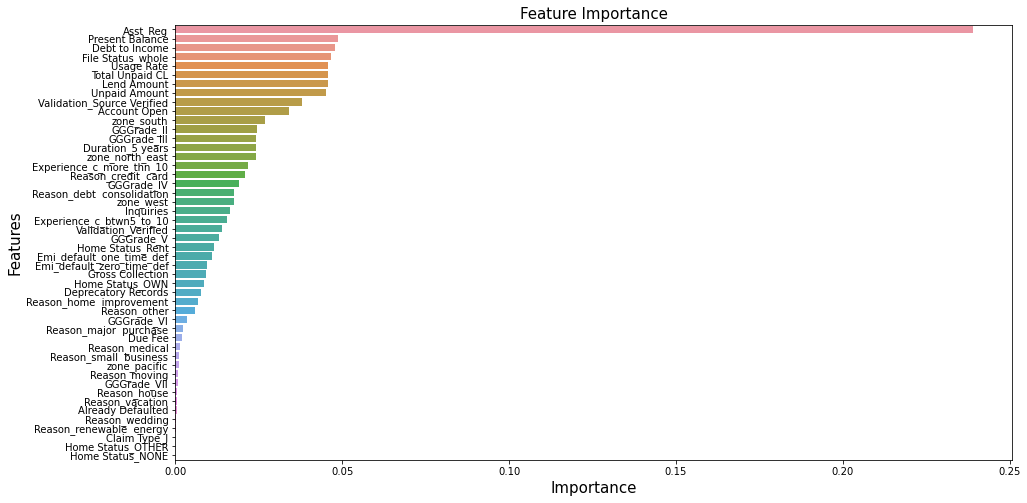

In [54]:
# Feature Importance

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

In [127]:
X_train['Home Status_NONE'].value_counts()

0    96895
1        3
Name: Home Status_NONE, dtype: int64

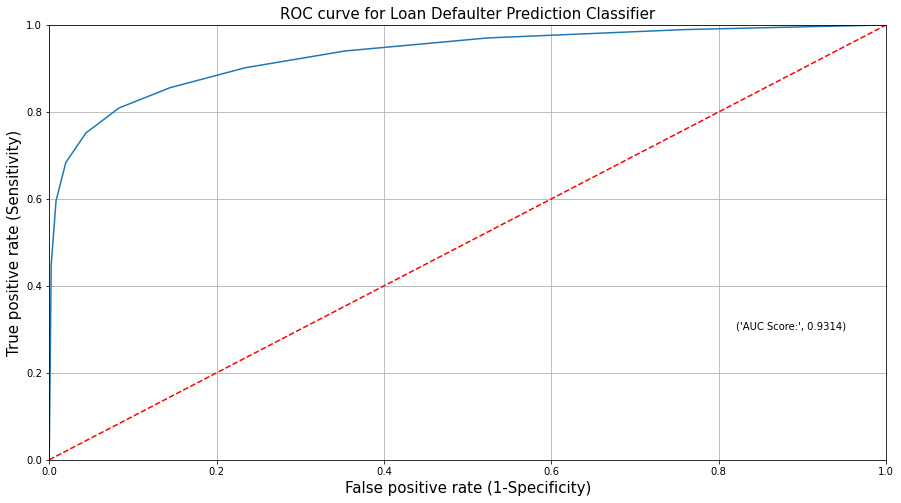

In [64]:
y_pred_prob = rf_model.predict_proba(X_test)[:,1]
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Loan Defaulter Prediction Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

MODEL 3
ADA BOOST MODEL

In [55]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

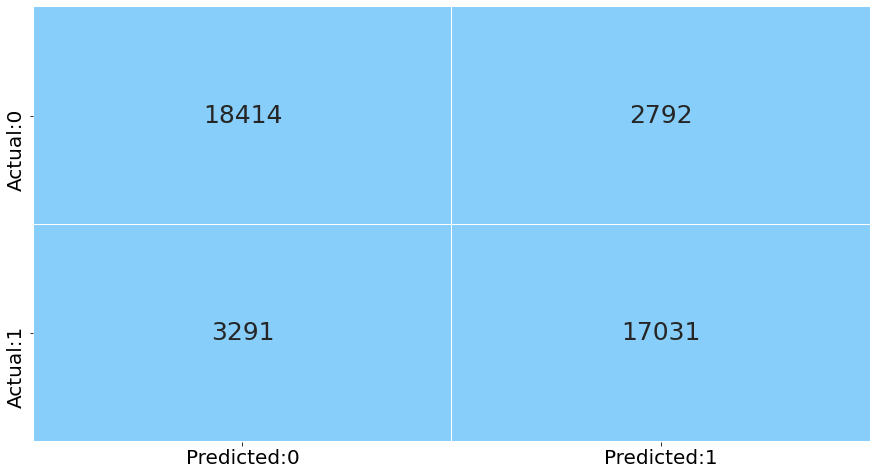

In [56]:
y_pred = ada_model.predict(X_test)
    
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [57]:
test_pred = ada_model.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     21206
           1       0.86      0.84      0.85     20322

    accuracy                           0.85     41528
   macro avg       0.85      0.85      0.85     41528
weighted avg       0.85      0.85      0.85     41528



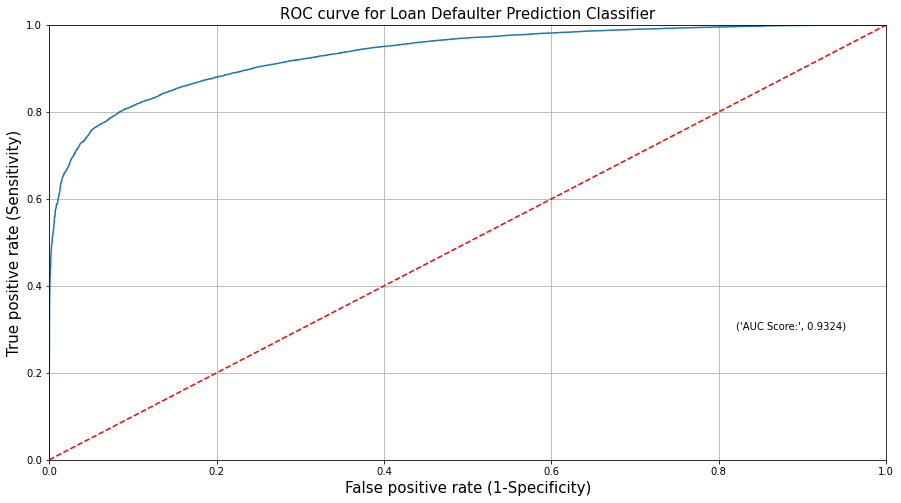

In [58]:
y_pred_prob = ada_model.predict_proba(X_test)[:,1]
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Loan Defaulter Prediction Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

### Model 4  
Gradient Boost Model

In [59]:
gboost_model = GradientBoostingClassifier(n_estimators =40, max_depth = 10, random_state = 10)

gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=40, random_state=10)

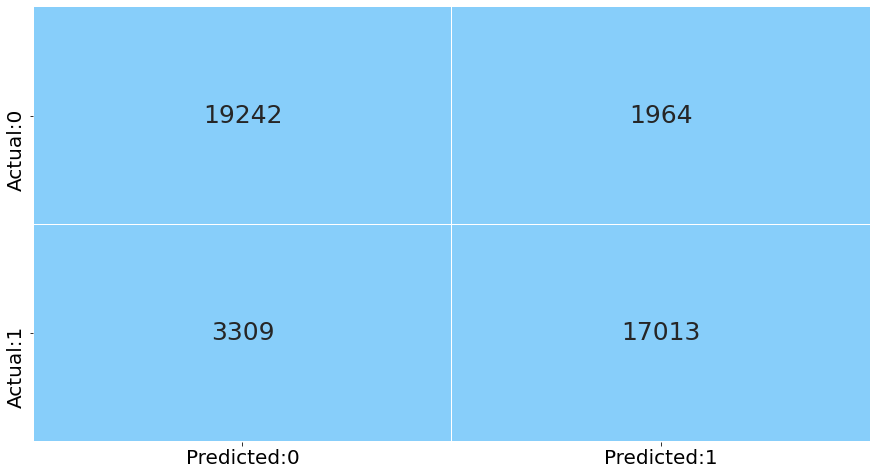

In [60]:
y_pred = gboost_model.predict(X_test)
    
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [61]:
test_pred = ada_model.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     21206
           1       0.86      0.84      0.85     20322

    accuracy                           0.85     41528
   macro avg       0.85      0.85      0.85     41528
weighted avg       0.85      0.85      0.85     41528



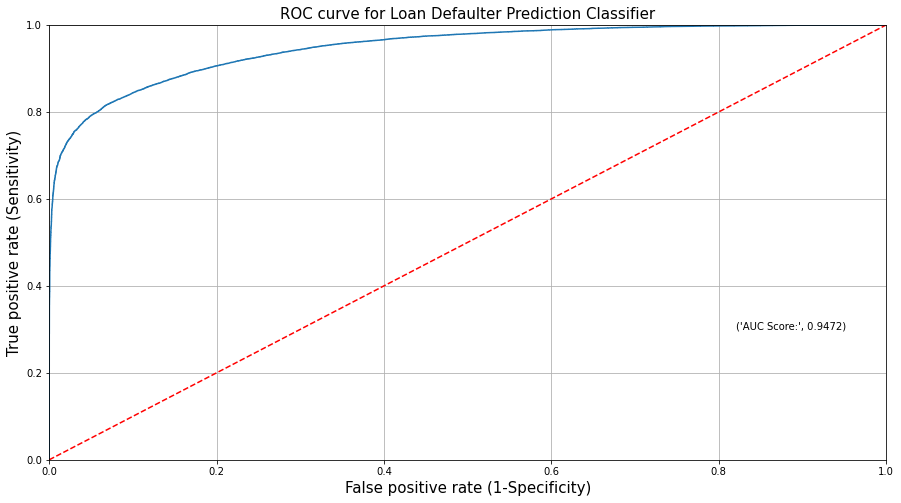

In [62]:
y_pred_prob = gboost_model.predict_proba(X_test)[:,1]
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Loan Defaulter Prediction Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [ ]:
## We choose random forest model as our final model as its giving us the higher f1 score.